<a href="https://colab.research.google.com/github/ali2066k/medical_imaging_tutorial/blob/main/VAEs_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

References:
* Bishop, C. M., & Bishop, H. (2023). Deep learning. In Springer eBooks. https://doi.org/10.1007/978-3-031-45468-4
* Kingma, D. P., & Welling, M. (2013, December 20). Auto-Encoding variational Bayes. arXiv.org. https://arxiv.org/abs/1312.6114
# Variational Autoencoders (VAEs) - brief summary
Variational Autoencoders (VAEs) are a type of generative model that learns to encode data into a probabilistic latent space and then generate new data by sampling from that space. They are based on Bayesian inference and use deep learning to approximate distributions.



### 1. Standard Autoencoders vs. VAEs
*   Standard Autoencoders: Compress input data into a low-dimensional latent space and then reconstruct it. They learn a fixed latent representation for each input.
*   VAEs: Instead of mapping inputs to a single point in latent space, they learn a probabilistic distribution (a mean and variance) over the latent space. This ensures smoother sampling and better generalization.

### 2. How VAEs Work
VAEs consist of:
*   **Encoder**: Maps input data  $x$  to a latent distribution  $q(z|x)$  with parameters  $(\mu, \sigma)$ , where:

  $z \sim \mathcal{N}(mu, \sigma^2)$

*   **Latent Space**: Instead of a deterministic latent vector, VAEs encode data into a distribution over latent variables  z .
*   **Decoder**: Maps a sampled latent variable  z  back to the data space to reconstruct  $x{\prime}$.

### 3. Objective Function (ELBO)

VAEs maximize the Evidence Lower Bound (ELBO), which consists of:

$\mathbb{E}{q(z|x)}[\log p(x|z)] - D{KL}(q(z|x) || p(z))$

where:
* The first term is the reconstruction loss (how well the model reconstructs the input).
* The second term is the Kullback-Leibler (KL) divergence, which ensures the learned latent space is close to a prior distribution (typically standard normal  $\mathcal{N}(0,1)$ ).

### 4. The Reparameterization Trick

* Sampling directly from  $z \sim \mathcal{N}(\mu, \sigma^2)$  is non-differentiable.
* Instead, we use:

  $z = \mu + \sigma \cdot \epsilon, \quad \epsilon \sim \mathcal{N}(0,1)$

  This allows gradients to flow through the network during backpropagation.

# VAE Detailed explanation

### Encoder-Decoder regime:
An encoder-decoder architecture aims to learn a compressed representation of data and reconstruct it back. Formally, given an input $\mathbf{x} \in \mathbb{R}^{d}$, the encoder maps it to a lower-dimensional latent representation $\mathbf{z} \in \mathbb{R}^{k}$ (where $k < d$), and the decoder reconstructs $\hat{\mathbf{x}}$ from $\mathbf{z}$:
\begin{equation}
    \mathbf{z} = f_\text{enc}(\mathbf{x}; \theta_\text{enc}), \quad \hat{\mathbf{x}} = f_\text{dec}(\mathbf{z}; \theta_\text{dec})
\end{equation}
where $\theta_\text{enc}$ and $\theta_\text{dec}$ are the encoder and decoder parameters, respectively.

### Principal Component Analysis (PCA) as an Encoder-Decoder Model

PCA can be formulated as a linear encoder-decoder framework:
- **Encoder (Projection):** Maps input $\mathbf{x}$ onto a lower-dimensional subspace via a linear transformation:
\begin{equation}
    \mathbf{z} = \mathbf{W}^T \mathbf{x},
\end{equation}
where $\mathbf{W} \in \mathbb{R}^{d \times k}$ consists of the top $k$ principal eigenvectors of the data covariance matrix.

- **Decoder (Reconstruction):** Reconstructs $\hat{\mathbf{x}}$ using the same projection matrix:
\begin{equation}
    \hat{\mathbf{x}} = \mathbf{W} \mathbf{z} = \mathbf{W} \mathbf{W}^T \mathbf{x}.
\end{equation}

Thus, PCA finds the optimal subspace such that the reconstruction error, measured as the squared Euclidean distance $\| \mathbf{x} - \hat{\mathbf{x}} \|^2$, is minimized. Unlike deep encoders, PCA assumes linear mappings and does not learn nonlinear transformations.

<!-- 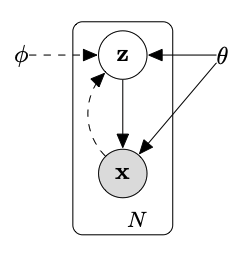 -->

Variational Autoencoders (VAEs) are based on latent variable models where observed data $\mathbf{x}$ is assumed to be generated from a latent variable $\mathbf{z}$. The goal is to approximate the intractable posterior $p(\mathbf{z} | \mathbf{x})$ using variational inference.

### Latent Variable Model:

We assume the generative process:
\begin{equation}
    p(\mathbf{z}) = \mathcal{N}(0, \mathbf{I})
\end{equation}
\begin{equation}
    p_\theta(\mathbf{x} | \mathbf{z})
\end{equation}
where $\theta$ are the parameters of the generative model (decoder). However, computing the exact posterior $p(\mathbf{z} | \mathbf{x})= \frac{p(\mathbf{x} | \mathbf{z})p(\mathbf{z})}{p(\mathbf{x})}$ requires intractable integration:
\begin{equation}
    p(\mathbf{x}) = \int p(\mathbf{x} | \mathbf{z}) p(\mathbf{z}) d\mathbf{z}.
\end{equation}

### Variational Inference:

Since $p(\mathbf{z} | \mathbf{x})$ is intractable, we approximate it with a variational distribution:
\begin{equation}
    q_\phi(\mathbf{z} | \mathbf{x}) \approx p(\mathbf{z} | \mathbf{x})
\end{equation}
where $q_\phi(\mathbf{z} | \mathbf{x})$ is parameterized as a Gaussian (bell-behaved distrobution):
\begin{equation}
    q_\phi(\mathbf{z} | \mathbf{x}) = \mathcal{N}(\mathbf{z} | \mu_\phi(\mathbf{x}), \sigma_\phi^2(\mathbf{x})).
\end{equation}
To enable backpropagation, we use the **reparameterization trick**:
\begin{equation}
    \mathbf{z} = \mu_\phi(\mathbf{x}) + \sigma_\phi(\mathbf{x}) \cdot \epsilon, \quad \epsilon \sim \mathcal{N}(0, I).
\end{equation}


### Kullback-Leibler (KL) Divergence

The Kullback-Leibler (KL) divergence is a fundamental concept in information theory that quantifies how one probability distribution differs from another.

The information content (or self-information) of an event associated with a probability distribution $p(x)$ is given by:
\begin{equation}
    I_p(x) = -\log p(x).
\end{equation}

The entropy of a distribution $p(x)$, which measures the expected amount of information required to describe a random variable, is defined as:
\begin{equation}
    H(p) = -\sum_x p(x) \log p(x).
\end{equation}

The **Kullback-Leibler (KL) divergence** measures the difference between two probability distributions and is given by:
\begin{equation}
    D_{KL}(q \| p) = H(p) - H(q) = -\sum_x p(x) \log p(x) + \sum_x q(x) \log q(x)
\end{equation}

This is not entirely accurate because, in KL divergence, the expectation is always taken with respect to a single probability distribution. If both terms are expressed in terms of the same probability distribution, the KL divergence is given by:
\begin{equation}
D_{KL}(q \| p) = - \sum_x q(x) \log \frac{p(x)}{q(x)}.
\end{equation}

In the continuous case, the KL divergence is given by:
\begin{equation}
    D_{KL}(q \| p) = - \int q(x) \log \frac{p(x)}{q(x)} dx.
\end{equation}


### Information-Theoretic Interpretation
KL divergence quantifies the information loss when approximating one distribution with another. It measures how much information is lost if we use the approximate distribution $q(z)$ instead of the true distribution $p(z)$. Lower KL divergence indicates that $q(z)$ closely resembles $p(z)$, while higher values signify greater deviation. In the context of VAEs, minimizing KL divergence ensures that the learned latent distribution remains close to the prior, facilitating meaningful sampling and regularization of the latent space.


Extracting the Evidence Lower Bound (ELBO)

We start with the KL divergence between the approximate posterior $q_\phi(z | x)$ and the true posterior $p_\theta(z | x)$:
\begin{equation}
    D_{KL}(q_\phi(z | x) \| p_\theta(z | x)) = - \int_q q_\phi(z | x) \log \frac{p_\theta(z | x)}{q_\phi(z | x)} dz.
\end{equation}

Using Bayes' theorem, we express $p_\theta(z | x)$ as:
\begin{equation}
    p_\theta(z | x) = - \frac{p_\theta(z,x)}{p_\theta(x)}.
\end{equation}

Substituting this into the KL divergence expression:
\begin{equation}
    D_{KL}(q_\phi(z | x) \| p_\theta(z | x)) =  - \int_q q_\phi(z | x) \log \frac{p_\theta(z,x)}{q_\phi(z | x) p_\theta(x)} dz.
\end{equation}

Splitting the logarithm:
\begin{equation}
    D_{KL}(q_\phi(z | x) \| p_\theta(z | x)) = - \int_q q_\phi(z | x) \left[ \log \frac{p_\theta(z,x)}{q_\phi(z)} - \log p_\theta(x) \right] dz.
\end{equation}

splitting the integral:
\begin{equation}
    D_{KL}(q_\phi(z | x) \| p_\theta(z | x)) = - \int_q q_\phi(z | x) \log \frac{p_\theta(z,x)}{q_\phi(z)} dz + \int_q q_\phi(z | x) \log p_\theta(x) dz.
\end{equation}

Since $\log p_\theta(x)$ is a constant:
\begin{equation}
    D_{KL}(q_\phi(z | x) \| p_\theta(z | x)) = - \int_q q_\phi(z | x) \log \frac{p_\theta(z,x)}{q_\phi(z)} dz + \left[\log p_\theta(x) \int_q q_\phi(z | x) dz \right].
\end{equation}

Since $q_\phi(z | x)$ is a probability distribution, then $\int_q q_\phi(z | x)$ is 1. Therefore:
\begin{equation}
    D_{KL}(q_\phi(z | x) \| p_\theta(z | x)) = - \int_q q_\phi(z | x) \log \frac{p_\theta(z,x)}{q_\phi(z)} dz + \log p_\theta(x).
\end{equation}

To minimize the KL divergence, we need to maximize the integral term a.k.a ELBO which is a **tractible** term. note: $\log p_\theta(x)$ is a constant.

Rearranging terms:
\begin{equation}
\log p_\theta(x) = D_{KL}(q_\phi(z | x) \| p_\theta(z | x)) + \int_q q_\phi(z | x) \log \frac{p_\theta(z,x)}{q_\phi(z)} dz
\end{equation}

**Evidence Lower Bound (ELBO)**:
\begin{equation}
    \mathcal{L}(\theta, \phi) = \int_q q_\phi(z | x) \log \frac{p_\theta(x|z)p(z)}{q_\phi(z)} dz
\end{equation}

Splitting the integral:
\begin{equation}
    \mathcal{L}(\theta, \phi) = \int_q q_\phi(z | x) \log p_\theta(x|z) dz + \int_q q_\phi(z) \log \frac{p(z)}{q(z)}
\end{equation}

The first integral term is: (a.k.a. log-likelihood; minimize the reconstruction error)
\begin{equation}
    \int_q q_\phi(z | x) \log p_\theta(x|z) dz = \mathbb{E}_{q_\phi(z | x)} \left[ \log p_\theta(x | z) \right]
\end{equation}

The second integral term is: (regularization; ensure that q is coming from a well-behaved distribution)
\begin{equation}
    \int_q q_\phi(z) \log \frac{p(z)}{q(z)} = - D_{KL}(q_\phi(z | x) \| p_\theta(z | x))
\end{equation}

Maximizing the ELBO allows us to simultaneously improve the likelihood of data reconstruction and regularize the latent space by keeping $q_\phi(z | x)$ close to the prior $p(z)$. This is the core optimization objective in Variational Autoencoders (VAEs).

### The Reparameterization Trick

The reparameterization trick is a crucial technique in Variational Autoencoders (VAEs) that enables efficient gradient-based optimization when sampling from a distribution.

In VAEs, we approximate the posterior distribution $q_\phi(z | x)$ using a parameterized distribution, typically a Gaussian:
\begin{equation}
    q_\phi(z | x) = \mathcal{N}(z; \mu_\phi(x), \sigma_\phi^2(x)).
\end{equation}

However, directly sampling $z$ from this distribution introduces a non-differentiable operation, preventing gradient-based learning via backpropagation.

The reparameterization trick circumvents this issue by expressing the random variable $z$ in terms of a differentiable transformation of a noise variable $\epsilon$, which follows a simple distribution (e.g., a standard normal distribution):
\begin{equation}
    z = \mu_\phi(x) + \sigma_\phi(x) \cdot \epsilon, \quad \epsilon \sim \mathcal{N}(0, I).
\end{equation}
Since $\mu_\phi(x)$ and $\sigma_\phi(x)$ are functions of $x$ and $\phi$, gradients can now propagate through them, allowing for efficient optimization via stochastic gradient descent.

### Formally:

The expectation of the log-likelihood term in the ELBO involves an expectation over $q_\phi(z | x)$:
\begin{equation}
    \mathbb{E}_{q_\phi(z | x)} [\log p_\theta(x | z)].
\end{equation}
However, direct differentiation w.r.t. $\phi$ is intractable due to the stochastic sampling process. By reparameterizing $z$ as:
\begin{equation}
    z = \mu_\phi(x) + \sigma_\phi(x) \cdot \epsilon, \quad \epsilon \sim \mathcal{N}(0, I),
\end{equation}
we transform the expectation into:
\begin{equation}
    \mathbb{E}_{\epsilon \sim \mathcal{N}(0, I)} [\log p_\theta(x | \mu_\phi(x) + \sigma_\phi(x) \cdot \epsilon)],
\end{equation}
which is now differentiable with respect to $\phi$.

### Why It Works

- The transformation ensures that $z$ retains the correct statistical properties.
- Since $\epsilon$ is independent of $\phi$, gradients can propagate through $\mu_\phi(x)$ and $\sigma_\phi(x)$, enabling efficient learning.
- This technique allows VAEs to be trained using backpropagation despite involving stochastic sampling.

The reparameterization trick is a fundamental tool that enables VAEs to learn meaningful latent representations while preserving end-to-end differentiability.

# Coding a simple VAE

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.5MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 505kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.59MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.24MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



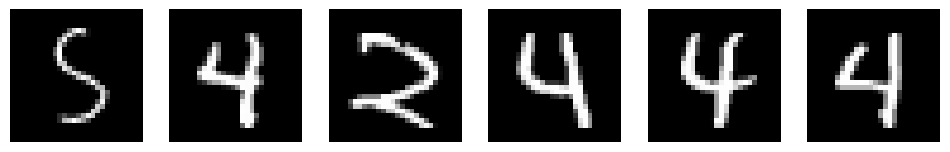

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=False)

# Visualizing random samples from dataset
def visualize_samples(dataset, num_samples=6):
    fig, axes = plt.subplots(1, num_samples, figsize=(12, 2))
    indices = np.random.choice(len(dataset), num_samples, replace=False)
    for i, idx in enumerate(indices):
        image, _ = dataset[idx]
        axes[i].imshow(image.squeeze(), cmap='gray')
        axes[i].axis('off')
    plt.show()

visualize_samples(train_dataset)

In [2]:
def vae_loss(recon_x, x, mu, log_var):
    # Reconstruction loss (Binary Cross Entropy)
    recon_loss = F.binary_cross_entropy(recon_x, x.view(-1, 28 * 28), reduction='sum')

    # KL Divergence loss
    kl_loss = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())

    return recon_loss + kl_loss

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class VAE(nn.Module):
    def __init__(self, input_dim=784, latent_dim=20, hidden_dim=512):
        super(VAE, self).__init__()

        # Encoder (Deeper with additional layers)
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim // 2)
        self.fc_mu = nn.Linear(hidden_dim // 2, latent_dim)
        self.fc_logvar = nn.Linear(hidden_dim // 2, latent_dim)

        # Decoder (Deeper with additional layers)
        self.fc3 = nn.Linear(latent_dim, hidden_dim // 2)
        self.fc4 = nn.Linear(hidden_dim // 2, hidden_dim)
        self.fc5 = nn.Linear(hidden_dim, input_dim)

    def encode(self, x):
        h = F.relu(self.fc1(x))
        h = F.relu(self.fc2(h))
        mu = self.fc_mu(h)
        log_var = self.fc_logvar(h)
        return mu, log_var

    def reparameterize(self, mu, log_var):
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h = F.relu(self.fc3(z))
        h = F.relu(self.fc4(h))
        return torch.sigmoid(self.fc5(h))

    def forward(self, x):
        mu, log_var = self.encode(x)
        z = self.reparameterize(mu, log_var)
        recon_x = self.decode(z)
        return recon_x, mu, log_var

In [11]:
# Training function
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vae = VAE().to(device)
optimizer = optim.Adam(vae.parameters(), lr=1e-3)

num_epochs = 50
vae.train()
for epoch in range(num_epochs):
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device).view(-1, 28 * 28)  # Flatten input images

        optimizer.zero_grad()
        recon_batch, mu, log_var = vae(data)
        loss = vae_loss(recon_batch, data, mu, log_var)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {train_loss / len(train_loader.dataset):.4f}")

Epoch 1, Loss: 174.5980
Epoch 2, Loss: 127.3232
Epoch 3, Loss: 116.8379
Epoch 4, Loss: 112.3862
Epoch 5, Loss: 109.5669
Epoch 6, Loss: 107.6048
Epoch 7, Loss: 106.2726
Epoch 8, Loss: 105.2676
Epoch 9, Loss: 104.3408
Epoch 10, Loss: 103.6562
Epoch 11, Loss: 103.0346
Epoch 12, Loss: 102.5508
Epoch 13, Loss: 102.0760
Epoch 14, Loss: 101.6599
Epoch 15, Loss: 101.2476
Epoch 16, Loss: 101.0208
Epoch 17, Loss: 100.6562
Epoch 18, Loss: 100.4525
Epoch 19, Loss: 100.1380
Epoch 20, Loss: 99.9606
Epoch 21, Loss: 99.7570
Epoch 22, Loss: 99.5404
Epoch 23, Loss: 99.3656
Epoch 24, Loss: 99.2232
Epoch 25, Loss: 99.0188
Epoch 26, Loss: 98.8751
Epoch 27, Loss: 98.7806
Epoch 28, Loss: 98.6204
Epoch 29, Loss: 98.4241
Epoch 30, Loss: 98.3473
Epoch 31, Loss: 98.2254
Epoch 32, Loss: 98.1664
Epoch 33, Loss: 98.0270
Epoch 34, Loss: 97.9547
Epoch 35, Loss: 97.8476
Epoch 36, Loss: 97.7960
Epoch 37, Loss: 97.6674
Epoch 38, Loss: 97.5818
Epoch 39, Loss: 97.5026
Epoch 40, Loss: 97.4579
Epoch 41, Loss: 97.3333
Epoch 

torch.Size([16, 20])


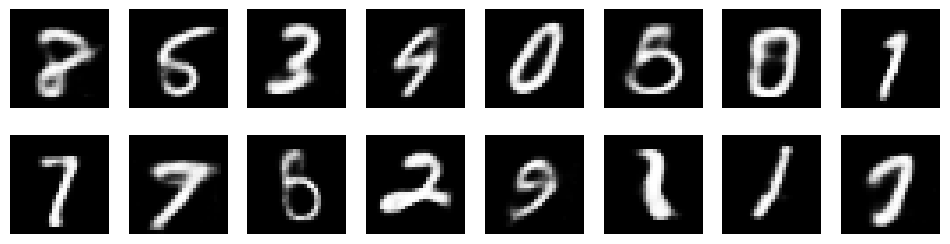

In [12]:
# Generate new samples by sampling from the prior distribution
vae.eval()
with torch.no_grad():
    z = torch.randn(16, 20).to(device)  # Sample from standard normal
    print(z.shape)
    samples = vae.decode(z).cpu().view(-1, 28, 28)

# Display generated samples
fig, axes = plt.subplots(2, 8, figsize=(12, 3))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(samples[i], cmap='gray')
    ax.axis('off')
plt.show()